<a href="https://colab.research.google.com/github/chaulagai2001/Speech_recognition/blob/main/model1_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa as lr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import IPython.display as ipd
import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pickle as pk
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, ZeroPadding2D
from collections import defaultdict

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:

X_train = np.load('train_data/X_train.npy')
y_train = np.load('train_data/y_train.npy')

# Load testing data
X_test = np.load('test_data/X_test.npy')
y_test = np.load('test_data/y_test.npy')

# Load validation data
X_val = np.load('val_data/X_val.npy')
y_val= np.load('val_data/y_val.npy')


## first model

In [ ]:
num_classes = len(pd.unique(y_train))

model = keras.Sequential()

# Flatten the input data
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(13, 32, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())

# Add Dense layers
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))

# Output layer
model.add(keras.layers.Dense(num_classes, activation='softmax'))

# Address deprecated warnings
import tensorflow as tf

# Replace tf.get_default_graph() with tf.compat.v1.get_default_graph()
tf.compat.v1.get_default_graph()

# Replace tf.nn.max_pool with tf.nn.max_pool2d
tf.nn.max_pool2d


<function tensorflow.python.ops.nn_ops.max_pool2d(input, ksize, strides, padding, data_format='NHWC', name=None)>

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 11, 30, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 15, 32)         0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2400)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1229312   
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                      

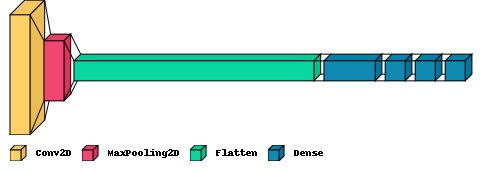

In [ ]:
import visualkeras

from collections import defaultdict

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'orange'
color_map[ZeroPadding2D]['fill'] = 'gray'
color_map[Dropout]['fill'] = 'pink'
color_map[MaxPooling2D]['fill'] = 'red'
color_map[Dense]['fill'] = 'green'
color_map[Flatten]['fill'] = 'teal'

visualkeras.layered_view(model, color_map=color_map, legend = True)

In [ ]:
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_val_reshaped = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)
print(X_train_reshaped.shape)
print(X_val_reshaped.shape)

(37664, 13, 32, 1)
(2093, 13, 32, 1)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'y_train' contains your string labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
hist=model.fit(X_train,y_train_encoded,epochs=30,validation_data=(X_val, y_val), callbacks = [early_stopping] )


Epoch 1/30

1177/1177 [==============================] - 23s 18ms/step - loss: 1.4302 - accuracy: 0.6653 - val_loss: 0.4461 - val_accuracy: 0.8634
Epoch 2/30
1177/1177 [==============================] - 21s 18ms/step - loss: 0.3244 - accuracy: 0.8962 - val_loss: 0.3558 - val_accuracy: 0.8820
Epoch 3/30
1177/1177 [==============================] - 22s 19ms/step - loss: 0.2190 - accuracy: 0.9285 - val_loss: 0.1889 - val_accuracy: 0.9345
Epoch 4/30
1177/1177 [==============================] - 21s 18ms/step - loss: 0.1686 - accuracy: 0.9440 - val_loss: 0.2440 - val_accuracy: 0.9264
Epoch 5/30
1177/1177 [==============================] - 20s 17ms/step - loss: 0.1418 - accuracy: 0.9528 - val_loss: 0.1959 - val_accuracy: 0.9408
Epoch 6/30
1177/1177 [==============================] - 20s 17ms/step - loss: 0.1163 - accuracy: 0.9621 - val_loss: 0.2083 - val_accuracy: 0.9369
Epoch 7/30
1177/1177 [==============================] - 20s 17ms/step - loss: 0.1134 - accuracy: 0.9635 - val_loss: 0.1672

In [ ]:
model.save("model_untuned.keras")

In [ ]:
history = hist.history

# Create a DataFrame
df = pd.DataFrame({
    'Epoch': range(1, len(history['loss']) + 1),
    'Training Loss': history['loss'],
    'Training Accuracy': history['accuracy']
})
if 'val_loss' in history:
    df['Validation Loss'] = history['val_loss']
    df['Validation Accuracy'] = history['val_accuracy']

# Display the DataFrame
df


,Epoch,Training Loss,Training Accuracy,Validation Loss,Validation Accuracy
0,1,1.430206,0.665330,0.446144,0.863354
1,2,0.324415,0.896187,0.355840,0.881988
2,3,0.218963,0.928473,0.188885,0.934544
3,4,0.168562,0.944031,0.244004,0.926421
4,5,0.141835,0.952820,0.195853,0.940755
5,6,0.116282,0.962139,0.208318,0.936933
6,7,0.113424,0.963466,0.167174,0.946011
7,8,0.093364,0.970396,0.108102,0.965122
8,9,0.090987,0.971246,0.088155,0.969900
9,10,0.074665,0.977113,0.147379,0.958911


In [ ]:
history_df = pd.DataFrame(hist.history)
history_df.to_csv("history.csv", index=False)

In [ ]:
predict=model.predict(X_test)
predict[0]

66/66 [==============================] - 1s 8ms/step


array([6.92457218e-29, 2.36453822e-29, 3.00127923e-31, 7.47884929e-38,
       2.44049662e-24, 2.94307510e-21, 1.30459959e-18, 7.92784502e-26,
       5.56152837e-35, 4.45990336e-29, 3.60635871e-28, 0.00000000e+00,
       5.00772689e-24, 2.23302446e-32, 0.00000000e+00, 1.25731825e-26,
       4.92896480e-30, 8.16292150e-33, 1.03789713e-27, 4.49537749e-15,
       1.64483488e-16, 1.22536462e-28, 1.53650619e-28, 2.12837381e-06,
       9.99997854e-01, 1.42890474e-16, 1.32525406e-27, 0.00000000e+00,
       3.23084307e-22, 5.86925170e-16], dtype=float32)

In [ ]:
predicted_labels = [np.argmax(row) for row in predict]
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predicted_labels
})
df_comparison

,Actual,Predicted
0,24,24
1,25,25
2,6,6
3,24,24
4,16,16
...,...,...
2087,16,16
2088,10,10
2089,19,19
2090,9,9


In [ ]:
df_csv = df_comparison.to_csv('df_comparison_csv.csv', index = False)

In [ ]:
label_csv = 'label.csv'
label = pd.read_csv(label_csv)
label

,Files
0,bed
1,bird
2,cat
3,dog
4,down
5,eight
6,five
7,four
8,go
9,happy


In [ ]:
df_comparison['Match_Status'] = np.where(df_comparison['Actual'] == df_comparison['Predicted'], 'Match', 'Mismatch')
df_comparison

,Actual,Predicted,Match_Status
0,24,24,Match
1,25,25,Match
2,6,6,Match
3,24,24,Match
4,16,16,Match
...,...,...,...
2087,16,16,Match
2088,10,10,Match
2089,19,19,Match
2090,9,9,Match


In [ ]:
match_mismatch_counts = df_comparison['Match_Status'].value_counts()

# Display the counts
print(match_mismatch_counts)

Match       2060
Mismatch      32
Name: Match_Status, dtype: int64


In [ ]:
df_comparison['Match_Status'] = np.where(df_comparison['Actual'] == df_comparison['Predicted'], 'Match', 'Mismatch')

# Group by 'Actual' and count the occurrences of 'Match' and 'Mismatch'
count_result = df_comparison.groupby(['Actual', 'Match_Status']).size().unstack(fill_value=0)

# Rename columns for better clarity
count_result.columns = ['Match', 'Mismatch']

# Reset index to make 'Actual' a regular column
count_result.reset_index(inplace=True)

# Print the result
count_result

,Actual,Match,Mismatch
0,0,66,4
1,1,62,2
2,2,57,0
3,3,73,3
4,4,49,0
5,5,54,0
6,6,63,0
7,7,125,1
8,8,48,1
9,9,89,1


In [ ]:
# Merge the DataFrames based on their index
merged_df = pd.merge(count_result, label, left_index=True, right_index=True)

# Print the merged DataFrame
print(merged_df)

    Actual  Match  Mismatch   Files
0        0     66         4     bed
1        1     62         2    bird
2        2     57         0     cat
3        3     73         3     dog
4        4     49         0    down
5        5     54         0   eight
6        6     63         0    five
7        7    125         1    four
8        8     48         1      go
9        9     89         1   happy
10      10    109         0   house
11      11     75         0    left
12      12     61         0  marvel
13      13     59         3    nine
14      14     42         3      no
15      15    102         2     off
16      16    109         2      on
17      17     62         1     one
18      18     70         0   right
19      19     70         1   seven
20      20     63         1  sheila
21      21     79         0     six
22      22     72         0    stop
23      23     52         0   three
24      24     54         0    tree
25      25     43         0     two
26      26     62         0 

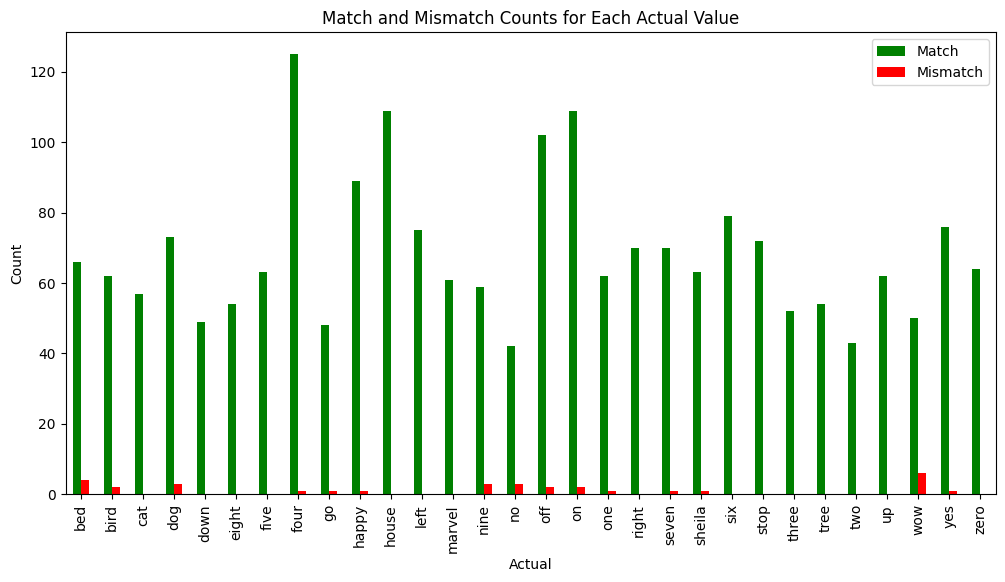

In [ ]:
import matplotlib.pyplot as plt

# Plotting the bar graph
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the 'Match' and 'Mismatch' columns for each 'Actual' value
merged_df.plot(x='Files', y=['Match', 'Mismatch'], kind='bar', ax=ax, color=['green', 'red'])

# Adding labels and title
plt.xlabel('Actual')
plt.ylabel('Count')
plt.title('Match and Mismatch Counts for Each Actual Value')

# Adding legend
plt.legend(["Match", "Mismatch"])

# Show the plot
plt.show()


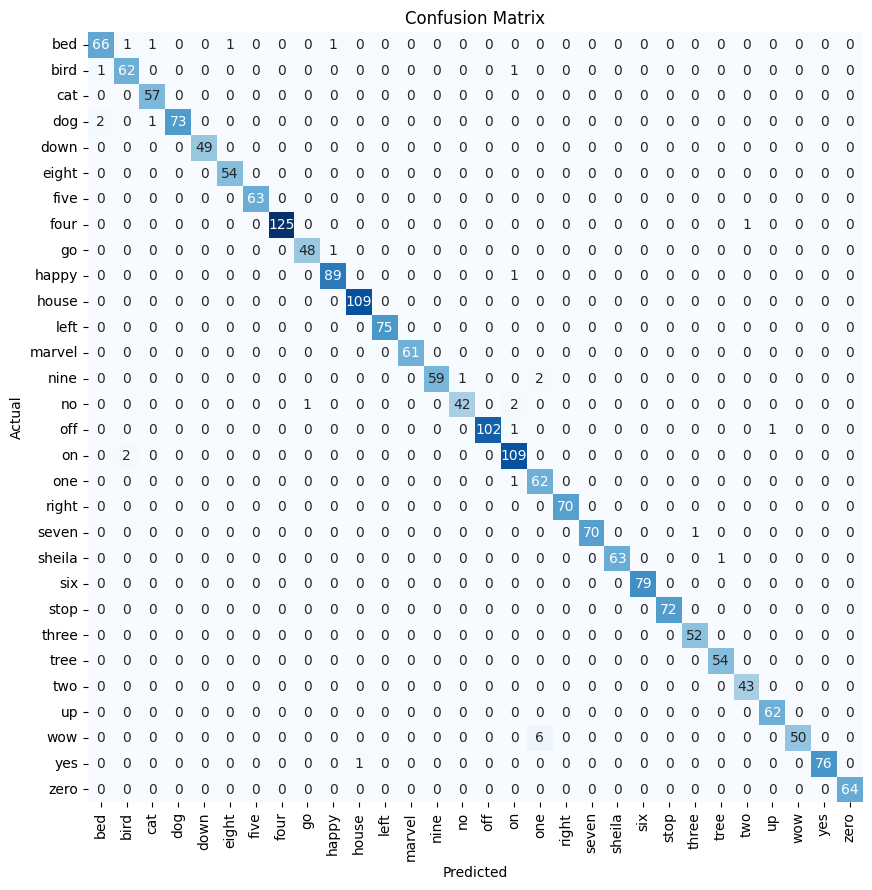

In [ ]:
# Create the 'Match_Status' column
df_comparison['Match_Status'] = np.where(df_comparison['Actual'] == df_comparison['Predicted'], 'Match', 'Mismatch')

# Generate the confusion matrix
conf_matrix = confusion_matrix(df_comparison['Actual'], df_comparison['Predicted'])

# Convert the confusion matrix to a DataFrame for better visualization
conf_df = pd.DataFrame(conf_matrix, index=label['Files'], columns=label['Files'])

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
df_comparison['Match_Status'] = np.where(df_comparison['Actual'] == df_comparison['Predicted'], 'Match', 'Mismatch')

# Generate the classification report
class_report = classification_report(df_comparison['Actual'], df_comparison['Predicted'], target_names=label['Files'])

# Print the classification report
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

         bed       0.96      0.94      0.95        70
        bird       0.95      0.97      0.96        64
         cat       0.97      1.00      0.98        57
         dog       1.00      0.96      0.98        76
        down       1.00      1.00      1.00        49
       eight       0.98      1.00      0.99        54
        five       1.00      1.00      1.00        63
        four       1.00      0.99      1.00       126
          go       0.98      0.98      0.98        49
       happy       0.98      0.99      0.98        90
       house       0.99      1.00      1.00       109
        left       1.00      1.00      1.00        75
      marvel       1.00      1.00      1.00        61
        nine       1.00      0.95      0.98        62
          no       0.98      0.93      0.95        45
         off       1.00      0.98      0.99       104
          on       0.95      0.98      0.96       111
   